# **Projeto de Estudos - Python Para Análise de Dados**

# 01 - Introdução

Olá! :D

Meu nome é Felipe Maciel e este é meu primeiro notebook no Kaggle.

Neste documento, irei demonstrar como acompanhei o desenvolvimento do projeto de conclusão do módulo 'Python Para Análise de Dados', do curso 'Cientista de Dados' da EBAC, a partir do material fornecido, criando meu storytelling e estudando as linhas de código.

# 02 - Descrição do Problema

A base de dados apresentada contém dados referentes a clientes de uma instituição bancária. O objetivo desse projeto é importar, tratar, filtrar e criar visualizações da base de dados, de tal forma que seja possível captar *insights* referentes ao estado de adimplência dos clientes, para identificar quais parâmetros estão atrelados à essa condição e qual perfil de cliente está mais propenso a ficar inadimplente no futuro.

Primeiramente, analisando a base de dados anexada a esse notebook, sabe-se que essa base contém índice (ID), status de inadimplência (default), idade, sexo, dependentes, escolaridade, estado_civil e entre outros dados de cada um dos clientes, com base nos quais podemos criar visualizações e identificar possíveis correlações.

# 03 - Importação das Bibliotecas

In [1]:
#Biblioteca Pandas, que contém as ferramentas necessárias para manipular dataframes
import pandas as pd

#Bibliotecas seaborn e matplotlib para fazer a plotagem dos gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# 04 - Carregamento da Base de Dados

Declaração de uma variável contendo o dataframe com os dados do arquivo CSV.

In [2]:
#dataframe contendo os dados extraídos da base
df = pd.read_csv('/kaggle/input/sampledata/10e.csv', na_values = 'na')

# 05 - Exploração

Nessa etapa, vamos observar nosso dataframe para encontrar possíveis caminhos a se tomar.

In [3]:
#breve visualização dos dados
df.head(n = 5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


Como demonstrado nos exemplos em aula, podemos extrair algumas métricas para termos uma visão geral antes de criar as representações. Um exemplo é visualizar a quantidade total de clientes, clientes adimplentes (default = 0) e inadimplentes (default = 1).

Vamos armazenar essas 3 métricas em variáveis para determinar a proporção entre elas.

In [4]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

#proporção
print(f'A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%')
print(f'A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%')

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


Podemos também usar comandos para ter uma vista geral dos dados de forma resumida. Primeiramente, conhecendo os tipos de campos em cada coluna, e em seguida utilizando o comando .describe().

In [5]:
#tipos de dados
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [6]:
#visão geral dos atributos 'string' (object)
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [7]:
#visão geral dos atributos numéricos (number)
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


Nos exemplos também foi abordado a existência de dados em vazio. Nessa porção iremos analisar colunas onde isso se aplica.

In [8]:
df.isna().any() #verifica em cada coluna se existem dados faltantes (True)

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [9]:
def stats_dados_faltantes(df: pd.DataFrame) -> None: #sem retorno, apenas print

  stats_dados_faltantes = [] #declara variável como lista
  for col in df.columns: #verificar coluna por coluna
    if df[col].isna().any(): #se houver dados faltantes, faça:
      qtd, _ = df[df[col].isna()].shape #identifica o número de dados faltantes
      total, _ = df.shape #armazena esse valor
      dict_dados_faltantes = {col: {'quantidade': qtd, 'porcentagem': round(100 * qtd/total, 2)}} #proporção
      stats_dados_faltantes.append(dict_dados_faltantes) #adiciona na lista

  for stat in stats_dados_faltantes: #print da lista
    print(stat)

Criada essa função, podemos aplicar filtros e obter outros dataframes mais filtrados. Como por exemplo:

In [10]:
#dados faltantes de clientes adimplentes
stats_dados_faltantes(df = df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


# 06 - Limpeza e Transformação

Quando identificamos os tipos de dado de cada coluna com df.dtypes, verificamos que algumas colunas que deviam conter números ('int64'), na verdade estão representadas como strings ('object'), o que pode causar impedimentos quando tentarmos criar métricas e plotar gráficos. Para isso, devemos fazer essa transformação nos dados.

In [11]:
#função substitui caracteres não desejados e transforma o resultado em um valor numérico
fn = lambda valor: float(valor.replace('.', '').replace(',', '.')) if isinstance(valor, str) else valor

#aplica a função nas colunas devidas
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

Continuando no procedimento de melhorar a qualidade dos dados, devemos remover os dados faltantes identificados no tópico anterior para trabalhar apenas com cadastros completos e válidos.

In [12]:
#remove as linhas com campos vazios e armazena no mesmo dataframe
df.dropna(inplace = True)

Vamos novamente identificar as proporções de adimplentes e inadimplentes, e comparar com os valores anteriores

In [13]:
#novas proporções
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

print(f'A proporcão de adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%')
print(f'A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%')
print(f'\nA proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%')
print(f'A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%')

A proporcão de adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão de clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


# 07 - Visualização de Dados

Agora que já tratamos adequadamente nossos dados, devemos criar visualizações. Para isso, vamos utilizar as bibliotecas seaborn e matplotlib, importadas no início deste notebook, com as quais iremos localizar os dados onde devem estar, como por exemplo definir corretamente os eixos, estabelecer a estética dos gráficos, tamanho e escala, para posteriormente interpretá-los.

In [14]:
sns.set_style('darkgrid') #definir estilo padrão dos gráficos

Vamos armazenar os dataframes referentes a adimplentes e inadimplentes.

In [15]:
df_adimplente = df[df['default'] == 0]

df_inadimplente = df[df['default'] == 1]

Criaremos 3 gráficos para cada dataframe distinto (total/adimplentes/inadimplentes), tanto para nível de escolaridade quanto para salário anual

A variável 'coluna' pode receber nomes de outras colunas a serem categorizadas e quantificadas da mesma forma, assim, pode-se interpretar esses dados e suas correlações para sugerir uma causalidade.

Vale ressaltar que nem sempre a correlação estatística garante que os dados são relacionados na prática, apenas apresentam um sinal que deve ser apurado pela interpretação antes de uma tomada de decisão.

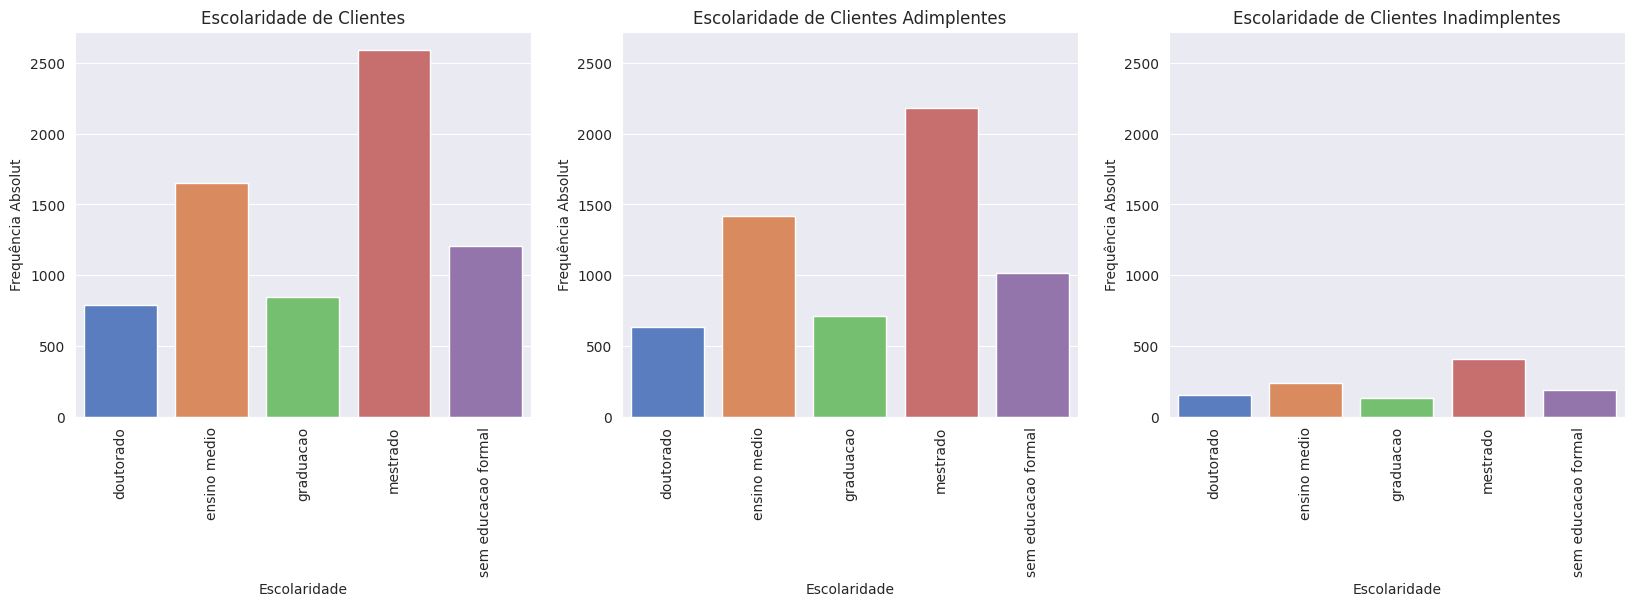

In [16]:
#Na variável 'coluna' insere-se a coluna base para a criação dos gráficos
coluna = 'escolaridade'
titulos = [
    'Escolaridade de Clientes',
    'Escolaridade de Clientes Adimplentes',
    'Escolaridade de Clientes Inadimplentes'
]

max_y = 0
figura, eixos = plt.subplots(1, 3, figsize = (20, 5), sharex = True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by = [coluna], inplace = True)

    f = sns.barplot(data = df_to_plot, x = coluna, y = 'frequencia_absoluta', ax = eixos[eixo], palette = 'muted')
    f.set(title = titulos[eixo], xlabel = coluna.capitalize(), ylabel = 'Frequência Absolut')
    f.set_xticklabels(labels = f.get_xticklabels(), rotation = 90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
    eixo.set(ylim = (0, max_y))

plt.show()


Observações (Nível de Escolaridade):
* Os clientes com maior salário são aqueles com maior nível de estudo, mas também são a maior população de inadimplentes;
* A faixa salarial de clientes inadimplentes é significativamente menor em todos os níveis de ensino.

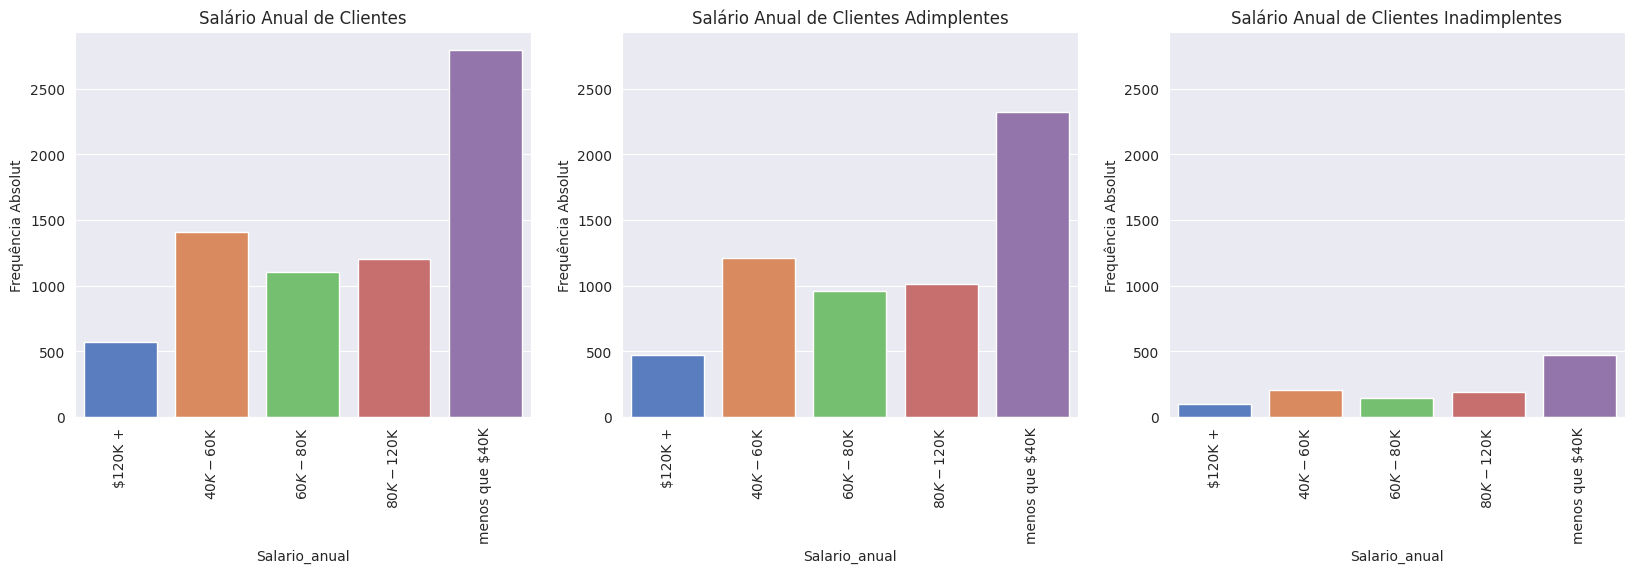

In [17]:
#Na variável 'coluna' insere-se a coluna base para a criação dos gráficos
coluna = 'salario_anual'
titulos = [
    'Salário Anual de Clientes',
    'Salário Anual de Clientes Adimplentes',
    'Salário Anual de Clientes Inadimplentes'
]

max_y = 0
figura, eixos = plt.subplots(1, 3, figsize = (20, 5), sharex = True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by = [coluna], inplace = True)

    f = sns.barplot(data = df_to_plot, x = coluna, y = 'frequencia_absoluta', ax = eixos[eixo], palette = 'muted')
    f.set(title = titulos[eixo], xlabel = coluna.capitalize(), ylabel = 'Frequência Absolut')
    f.set_xticklabels(labels = f.get_xticklabels(), rotation = 90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
    eixo.set(ylim = (0, max_y))

plt.show()


Observações (Salário Anual):
* A maioria dos clientes dessa instituição possuem renda inferior a RS40k anuais, o que é uma indicação clara do público-alvo. Isso pode ser útil na criação de produtos/serviços e campanhas publicitárias, por exemplo.

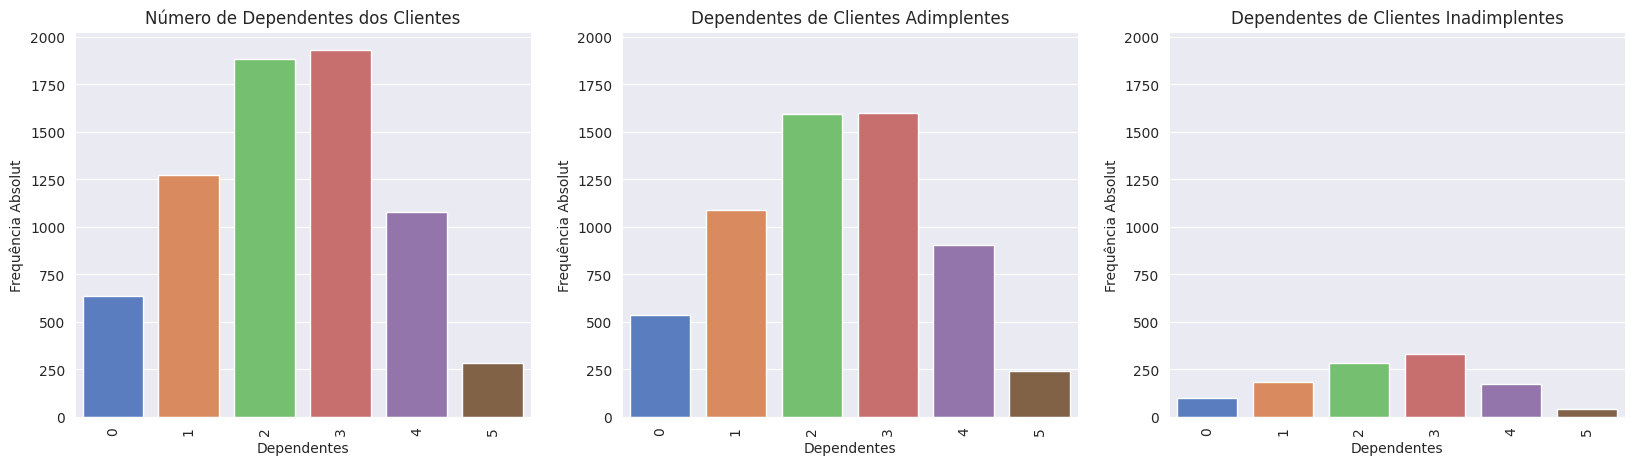

In [18]:
#Na variável 'coluna' insere-se a coluna base para a criação dos gráficos
coluna = 'dependentes'
titulos = [
    'Número de Dependentes dos Clientes',
    'Dependentes de Clientes Adimplentes',
    'Dependentes de Clientes Inadimplentes'
]

max_y = 0
figura, eixos = plt.subplots(1, 3, figsize = (20, 5), sharex = True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by = [coluna], inplace = True)

    f = sns.barplot(data = df_to_plot, x = coluna, y = 'frequencia_absoluta', ax = eixos[eixo], palette = 'muted')
    f.set(title = titulos[eixo], xlabel = coluna.capitalize(), ylabel = 'Frequência Absolut')
    f.set_xticklabels(labels = f.get_xticklabels(), rotation = 90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
    eixo.set(ylim = (0, max_y))

plt.show()


Observações (Dependentes):
* A maioria dos clientes possuem entre 2 e 3 filhos;
* As categorias Mantém sua proporção, o que significa que o número de dependentes não necessariamente tem relação com o estado de adimplência.

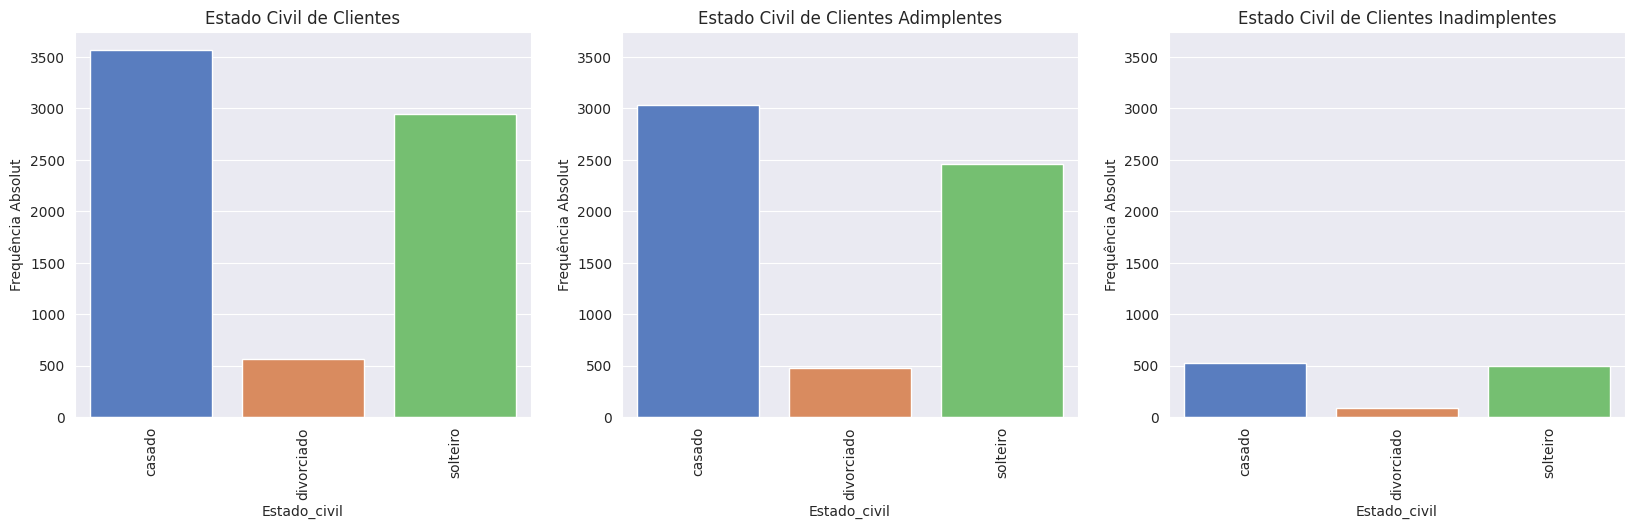

In [19]:
#Na variável 'coluna' insere-se a coluna base para a criação dos gráficos
coluna = 'estado_civil'
titulos = [
    'Estado Civil de Clientes',
    'Estado Civil de Clientes Adimplentes',
    'Estado Civil de Clientes Inadimplentes'
]

max_y = 0
figura, eixos = plt.subplots(1, 3, figsize = (20, 5), sharex = True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by = [coluna], inplace = True)

    f = sns.barplot(data = df_to_plot, x = coluna, y = 'frequencia_absoluta', ax = eixos[eixo], palette = 'muted')
    f.set(title = titulos[eixo], xlabel = coluna.capitalize(), ylabel = 'Frequência Absolut')
    f.set_xticklabels(labels = f.get_xticklabels(), rotation = 90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
    eixo.set(ylim = (0, max_y))

plt.show()


Observações (Estado Civil):
* A maior população de clientes com estado civil 'casado' é a maior entre as 3 classes, o que pode trazer uma perspectiva do estilo de vida dessa população. Um exemplo de utilidade para essa análise é o dimensionamento da quantidade de crédito disponível para cada tipo de cliente, avaliando também histórico de inadimplência de tais perfis.

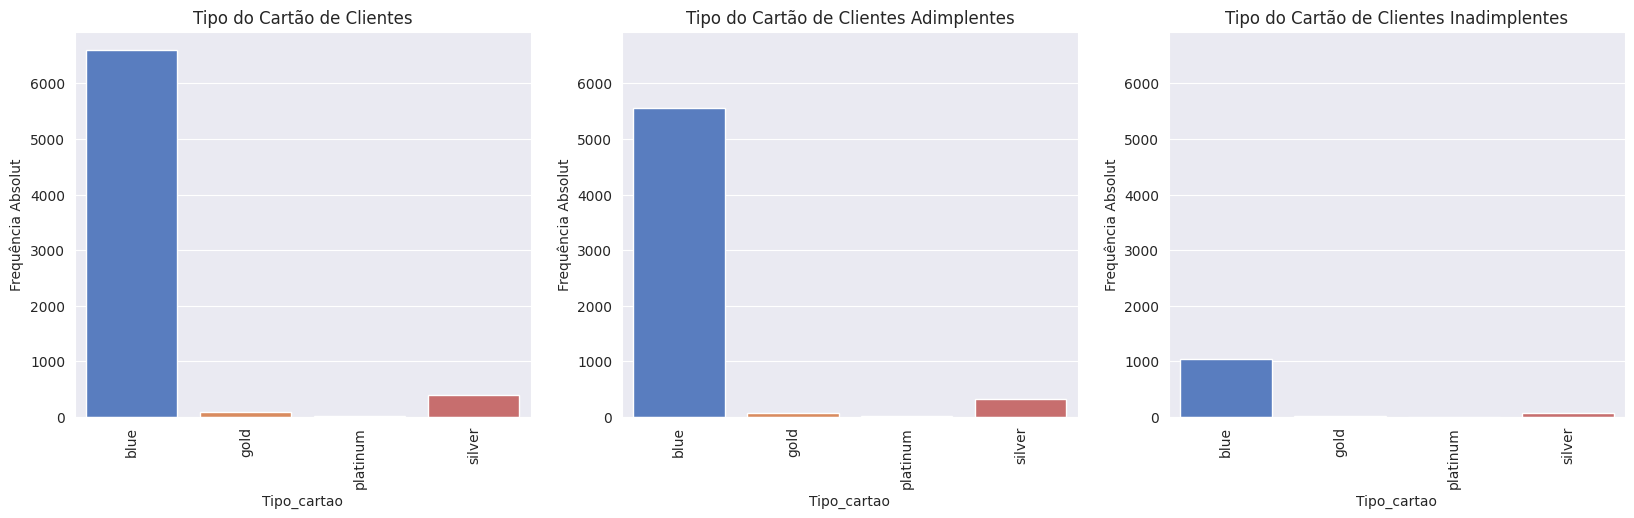

In [20]:
#Na variável 'coluna' insere-se a coluna base para a criação dos gráficos
coluna = 'tipo_cartao'
titulos = [
    'Tipo do Cartão de Clientes',
    'Tipo do Cartão de Clientes Adimplentes',
    'Tipo do Cartão de Clientes Inadimplentes'
]

max_y = 0
figura, eixos = plt.subplots(1, 3, figsize = (20, 5), sharex = True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by = [coluna], inplace = True)

    f = sns.barplot(data = df_to_plot, x = coluna, y = 'frequencia_absoluta', ax = eixos[eixo], palette = 'muted')
    f.set(title = titulos[eixo], xlabel = coluna.capitalize(), ylabel = 'Frequência Absolut')
    f.set_xticklabels(labels = f.get_xticklabels(), rotation = 90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
    eixo.set(ylim = (0, max_y))

plt.show()

Observações (Tipo do Cartão):
* É bastante evidente que a maior parte dos clientes possuem o cartão Blue.

# 08 - Conclusão

Ao longo do escopo desse projeto de estudos, pudemos passar pelas etapas triviais do cientista de dados, que são a **obtenção, exploração, limpeza e tratamento, visualização e interpretação dos resultados**. Essas etapas são responsáveis por criar materiais para consulta e embasamento para a gestão dos recursos da empresa (*Data Driven*).

Quanto aos *insights* extraídos, o principal fator determinante no nível de inadimplência **não parece ser** a faixa salarial, sexo, número de dependentes ou estado civil, mas sim, **nível de escolaridade** e **tipo de cartão**. Talvez seja contra-intuitivo identificar que a faixa salarial possui pouca influência no número de inadimplentes (talvez tenham relação com o montante de valor devido, ou a proporção de dívida referente ao salário).

Sugestões de ações que podem ser consideradas:
* Campanha publicitária com a finalidade de atrair mais clientes de um perfil que tenha um balanceamento entre menor taxa de inadimplência e maior população;
* Criar e direcionar um material dedicado à educação financeira dos clientes inadimplentes ou aqueles que possuem o mesmo perfil mas não são inadimplentes;
* Evoluir as técnicas de comunicação entre a empresa e o cliente para notificá-los que estão inadimplentes ou que têm risco de estar;
* Ajustar o limite de crédito dos clientes com base em seu histórico de crédito.

Algo que eu gostaria de fazer porém **ainda** não tenho conhecimento de programação para realizar, seria comparar, em uma determinada coluna, a proporção de adimplentes/inadimplentes numericamente em uma tabela, para poder verificar quais as maiores diferenças e assim, ter mais certeza ao apontar as diferenças.

Com as visualizações, observamos alguns aspectos de cada um dos escopos, criando *insights* que podem ser úteis para a **tomada de decisão**. Ainda assim, é sempre bem vinda a adição de novas perspectivas sobre os dados, para que não hajam interpretações equivocadas, isso pode ser atingido vindo do compartilhamento e discussão em equipe.

Assim, encerro este documento, e vejo que este projeto foi muito útil para estudar tanto os conceitos de ciência de dados, quanto a linguagem de programação em si.